# Librerias:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import plotly.express as px
import math
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Importamos el fichero:

In [2]:
df = pd.read_csv(r"../data/datos.csv")

# EDA (exploratory data analysis)

## Análisis general:

Tenemos 15 columnas y 450 filas:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mood              465 non-null    object 
 1   song_name         465 non-null    object 
 2   song_uri          465 non-null    object 
 3   artist_name       465 non-null    object 
 4   popularity        465 non-null    int64  
 5   danceability      465 non-null    float64
 6   energy            465 non-null    float64
 7   key               465 non-null    int64  
 8   loudness          465 non-null    float64
 9   mode              465 non-null    int64  
 10  speechiness       465 non-null    float64
 11  acousticness      465 non-null    float64
 12  instrumentalness  465 non-null    float64
 13  liveness          465 non-null    float64
 14  valence           465 non-null    float64
 15  tempo             465 non-null    float64
 16  duration_ms       465 non-null    int64  
dt

Como la variable song_uri está al principio y ocupa mucho espacio la muevo al final.

In [4]:
df.columns.get_loc('duration_ms')

16

In [5]:
# Extraer la columna
column_to_move = df.pop('song_uri')

# Insertar la columna en la posición deseada
df.insert(16, 'song_uri', column_to_move)
df

,Mood,song_name,artist_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,song_uri
0,Happy,I'm Good (Blue),David Guetta,95,0.561,0.9650,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,175238,spotify:track:4uUG5RXrOk84mYEfFvj3cK
1,Happy,I Ain't Worried,OneRepublic,95,0.704,0.7970,0,-5.927,1,0.0475,0.08260,0.000745,0.0546,0.825,139.994,148486,spotify:track:4h9wh7iOZ0GGn8QVp4RAOB
2,Happy,Dance The Night (From Barbie The Album),Dua Lipa,94,0.671,0.8450,11,-4.930,0,0.0480,0.02070,0.000000,0.3290,0.775,110.056,176579,spotify:track:1vYXt7VSjH9JIM5oRRo7vA
3,Happy,Blinding Lights,The Weeknd,94,0.514,0.7300,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040,spotify:track:0VjIjW4GlUZAMYd2vXMi3b
4,Happy,Watermelon Sugar,Harry Styles,92,0.548,0.8160,0,-4.209,1,0.0465,0.12200,0.000000,0.3350,0.557,95.390,174000,spotify:track:6UelLqGlWMcVH1E5c4H7lY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,Focus,remembrance,Dreams Ahead,52,0.461,0.0611,0,-20.555,1,0.0440,0.96200,0.930000,0.1120,0.133,120.815,195122,spotify:track:5NFybpngup7caMPSMiJ5ZO
461,Focus,Are You Up,Agnes Lundh,51,0.597,0.1270,5,-17.192,0,0.0370,0.99100,0.929000,0.1260,0.135,70.051,152597,spotify:track:3xXQCt1vfzNEOndrrNWAZR
462,Focus,waveforms,Joy Parade,51,0.389,0.1810,10,-18.820,1,0.0297,0.87400,0.905000,0.1160,0.111,73.869,163232,spotify:track:2dwLTY84vCeubyM0jM0nXH
463,Focus,miniature things,Tall Towers,51,0.487,0.1430,0,-17.674,1,0.0400,0.98100,0.904000,0.1150,0.160,73.548,143872,spotify:track:3kKwXt8TAU7wMCPIPCrzkI


## Análisis variables categóricas:

¿Con qué muestra contamos?

In [6]:
df['Mood'].value_counts().sum()

465

In [7]:
df['Mood'].value_counts()

Mood
Happy    100
Sad      100
Fear     100
Focus    100
Anger     65
Name: count, dtype: int64

In [8]:

mood_values = df['Mood'].value_counts()
fig = px.bar(x=mood_values.index, y=mood_values.values, template = 'ggplot2')
fig.update_layout(
    xaxis_title="Estado de ánimo/Mood",
    yaxis_title="Tamaño de la muestra")
fig.show()

Como se puede ver de la playlist relacionado con el estado de ánimo ira o 'Anger' contamos con tan sólo 65 valores.  
Si vemos que más adelante nos da problemas el modelo entrenado eliminaremos o no tendremos en cuenta este estado de ánimo dependiendo del número de parámetros que se utilicen.

En general, se suele decir que se necesitan al menos varias decenas o cientos de muestras de entrenamiento por cada variable de entrada (característica) que se utilice en el modelo. Esto se conoce como la regla de "diez veces el número de variables por muestra". Por ejemplo, si tienes 10 características, podrías necesitar al menos 100 muestras de entrenamiento.  

Así que, en principio, mi análisis se centrará en unos 10 parámetros aproximadamente para que se cumpla esta regla, por lo menos para los cuatro primeros estados de ánimo.

https://postindustria.com/how-much-data-is-required-for-machine-learning/#:~:text=The%20most%20common%20way%20to,parameters%20in%20your%20data%20set.

¿Se repetirá algún artista en los diferentes estados de ánimo?

In [9]:
df['artist_name'].value_counts()

artist_name
Taylor Swift      6
Ed Sheeran        6
Imber Sun         5
Harry Styles      5
Josef Briem       5
                 ..
Lady Wray         1
Elle King         1
Beyoncé           1
Colbie Caillat    1
Melvin Barker     1
Name: count, Length: 352, dtype: int64

Parece que Taylor Swift y Ed Sheeran son los que más se repiten en esta muestra.

## Análisis variables numéricas:

### Análisis en detalle de las emociones y sus características:

**En este apartado vamos a analizar una a una cada emoción para entender en que se ha basado Spotify a la hora de crear esas playlists.**

Como hay variables entre rangos acotados se analizarán los ouliers de aquellas variables que no están acotadas, es decir, 'duration_ms', 'loudness' y 'tempo'.

#### 1. Felicidad / Happy

In [10]:
happy_df = df[(df.Mood == 'Happy')]
happy_df

,Mood,song_name,artist_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,song_uri
0,Happy,I'm Good (Blue),David Guetta,95,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,175238,spotify:track:4uUG5RXrOk84mYEfFvj3cK
1,Happy,I Ain't Worried,OneRepublic,95,0.704,0.797,0,-5.927,1,0.0475,0.08260,0.000745,0.0546,0.825,139.994,148486,spotify:track:4h9wh7iOZ0GGn8QVp4RAOB
2,Happy,Dance The Night (From Barbie The Album),Dua Lipa,94,0.671,0.845,11,-4.930,0,0.0480,0.02070,0.000000,0.3290,0.775,110.056,176579,spotify:track:1vYXt7VSjH9JIM5oRRo7vA
3,Happy,Blinding Lights,The Weeknd,94,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040,spotify:track:0VjIjW4GlUZAMYd2vXMi3b
4,Happy,Watermelon Sugar,Harry Styles,92,0.548,0.816,0,-4.209,1,0.0465,0.12200,0.000000,0.3350,0.557,95.390,174000,spotify:track:6UelLqGlWMcVH1E5c4H7lY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Happy,Higher Power,Coldplay,76,0.507,0.828,10,-6.023,1,0.0449,0.00711,0.000024,0.2610,0.489,178.032,211295,spotify:track:0939D7aT18uBDS2MTjWzct
96,Happy,Iko Iko (My Bestie),Justin Wellington,76,0.862,0.753,5,-5.356,1,0.0625,0.13100,0.000002,0.0770,0.827,105.039,182857,spotify:track:7MC4XR9M9amdmKQr2iDF7i
97,Happy,Woke Up in Love,Kygo,75,0.643,0.585,2,-5.994,1,0.0369,0.22500,0.000000,0.0927,0.188,106.015,216873,spotify:track:21H0pUV2uPIPcFnFhgTBjo
98,Happy,Wellerman - Sea Shanty / 220 KID x Billen Ted ...,Nathan Evans,75,0.722,0.893,0,-3.255,0,0.0475,0.04410,0.000937,0.0673,0.439,119.932,116750,spotify:track:3iw6V4LH7yPj1ESORX9RIN


##### 1.1 Variables no acotadas (duration_ms, loudness y tempo)

Análisis de outliers y distribución de las variables 'duration_ms', 'loudness' y 'tempo' para el estado de ánimo de felicidad: 'Happy'.

In [11]:
happy_df.columns

Index(['Mood', 'song_name', 'artist_name', 'popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'song_uri'],
      dtype='object')

In [12]:
# Convierto ms a minutos: 1 min = 60.000 ms
happy_df['duration_ms'] = happy_df['duration_ms']/60000

C:\Users\User\AppData\Local\Temp\ipykernel_4756\2860192246.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
cols = ['duration_ms', 'loudness', 'tempo']

fig = make_subplots(rows=1, cols=3, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(go.Box(y=happy_df[col], name=col), row=1, col=i+1)

fig.update_layout(
    title="Distribución de variables:",
    height=400,
    width=900
)

fig.show()

¿Cuántos outliers hay en cada variable para saber si eliminar o no?

In [14]:
# Para ver la cantidad de outliers que hay en nuestro dataset
cols = ['duration_ms', 'loudness', 'tempo']
def outliers1 (df):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlierIzq = Q1-(1.5*IQR)
        outlierDer = Q3+(1.5*IQR)
        outliers = df[col][(df[col] < outlierIzq) | (df[col] > outlierDer)]
        print("La variable " + col + " tiene " + str(len(outliers)) + " valores atípicos u 'outliers'")

    
outliers1(happy_df)

La variable duration_ms tiene 5 valores atípicos u 'outliers'
La variable loudness tiene 3 valores atípicos u 'outliers'
La variable tempo tiene 8 valores atípicos u 'outliers'


La duración tiene un outlier que puede distorsionar más el análisis. El resto no parece que sea necesario eliminarlas.

In [15]:
happy_df[['duration_ms','loudness','tempo']].describe()

,duration_ms,loudness,tempo
count,100.000000,100.00000,100.000000
mean,3.044182,-5.31141,120.257710
std,0.601098,1.71028,21.574232
min,1.829167,-10.77800,79.994000
25%,2.713467,-6.39275,106.784500
50%,3.013933,-4.90400,119.949000
75%,3.305417,-4.10950,127.845000
max,5.710217,-2.39200,182.162000


Las canciones de la playlist que representa la alegría:  
- **Duración**: Tienen una duración media de 3 min. Vemos que la mayoría de los datos se encuentran entre 2 y 3 min. Hay algún outlier de canciones que duran más de 4 min.
- **Sonoridad**: De media las canciones alegres rondan los -5 dB y hay ouliers que rondan los -10 dB.
- **Tempo**: Las canciones alegres tienen de media 120 pulsaciones por minuto (Bps) y hay ouliers que se encuentran por encima de las pulsaciones por minuto.

##### 1.2 Variables acotadas

In [16]:
happy_df.columns

Index(['Mood', 'song_name', 'artist_name', 'popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'song_uri'],
      dtype='object')

Del resto de variables se ha realizado una selección y se analizan las más interesantes:

In [17]:
cols = ['popularity','danceability', 'energy','valence', 'speechiness','instrumentalness']

fig = make_subplots(rows=2, cols=3, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(go.Histogram(y=happy_df[col], name=col), row=(i // 3) + 1, col=(i % 3) + 1)

fig.update_layout(
    title="Histogramas:",
    height=600,
    width=900
)

fig.show()

Vemos que las canciones alegres según la lista que ha generado Spotify:  
- Por lo general son canciones bastante populares (con un 80 sobre 100 de media podriamos decir).  
- En cuanto a la bailabilidad la mayoría son bailables ya que los valores están cerca del 1.  
- Son canciones enérgicas.  
- Respecto a la valencia son canciones alegres en su mayoría aunque parece que hay canciones con valencia muy baja. La valencia indica cuan alegres son las canciones por eso nos choca un poco al ver esto.  
- Son canciones que no son habladas o rapeadas.  
- Por último, vemos que casi todas las canciones tienen voces, no son puramente instrumentales.

#### 2. Tristeza / Sad

In [18]:
sad_df = df[(df.Mood == 'Sad')]
sad_df

,Mood,song_name,artist_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,song_uri
100,Sad,When I Was Your Man,Bruno Mars,91,0.612,0.280,0,-8.648,1,0.0434,0.9320,0.000000,0.0880,0.387,72.795,213827,spotify:track:0nJW01T7XtvILxQgC5J7Wh
101,Sad,When We Were Young,Adele,77,0.376,0.595,3,-5.936,1,0.0496,0.3030,0.000000,0.0950,0.265,144.361,290900,spotify:track:7GgWAITsYJaRM3r50rfh5w
102,Sad,Sparks,Coldplay,88,0.371,0.268,1,-10.506,1,0.0281,0.7480,0.051700,0.1040,0.165,102.617,227093,spotify:track:7D0RhFcb3CrfPuTJ0obrod
103,Sad,Only Love Can Hurt Like This,Paloma Faith,86,0.566,0.885,8,-4.528,1,0.0818,0.0958,0.000100,0.3340,0.304,90.990,232893,spotify:track:62ke5zFUJN6RvtXZgVH0F8
104,Sad,Slide Away,Miley Cyrus,70,0.534,0.538,5,-6.673,1,0.0327,0.1730,0.000003,0.2480,0.289,148.016,233654,spotify:track:6QQtHdz4PNJWQX4nrAQGC9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Sad,Say Something,A Great Big World,57,0.447,0.158,2,-7.571,1,0.0360,0.8720,0.000002,0.0816,0.142,140.942,233267,spotify:track:2fPb58e6f8KxejYDCaARwS
196,Sad,LOVE ME OR LEAVE ME,Munn,56,0.732,0.459,6,-8.029,1,0.0898,0.5240,0.000000,0.0816,0.481,130.136,146457,spotify:track:0zUT6RbKCqHqorVnXVoZcm
197,Sad,Til It Happens To You,Lady Gaga,56,0.401,0.539,0,-4.719,1,0.0350,0.5650,0.000000,0.0933,0.150,113.870,258093,spotify:track:0bCCGLHflR08UVA6oJJc8I
198,Sad,Never on the Day You Leave,John Mayer,55,0.536,0.355,2,-8.610,1,0.0259,0.7330,0.000012,0.1380,0.220,139.888,220867,spotify:track:3TQbr3G3U5wlwEJejmqC1F


##### 2.1 Variables no acotadas (duration_ms, loudness y tempo)

In [19]:
# Convierto ms a minutos: 1 min = 60.000 ms
sad_df['duration_ms'] = sad_df['duration_ms']/60000

C:\Users\User\AppData\Local\Temp\ipykernel_4756\1980610954.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
cols = ['duration_ms', 'loudness', 'tempo']

fig = make_subplots(rows=1, cols=3, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(go.Box(y=sad_df[col], name=col), row=1, col=i+1)

fig.update_layout(
    title="Distribución de variables:",
    height=400,
    width=900
)

fig.show()

In [21]:
sad_df[['duration_ms','loudness','tempo']].describe()

,duration_ms,loudness,tempo
count,100.000000,100.000000,100.000000
mean,3.866188,-8.589860,116.148770
std,0.774968,3.147622,32.255505
min,2.250217,-22.320000,64.303000
25%,3.393246,-10.107000,88.472250
50%,3.760533,-8.050500,113.271000
75%,4.263725,-6.358750,140.480750
max,6.897117,-3.631000,187.376000


Las canciones de la playlist que representa la tristeza:  
- **Duración**: Tienen una duración media de 4 min aprox. Vemos que la mayoría de los datos se encuentran entre 3 y 4 min. 
- **Sonoridad**: De media las canciones tristes se encuentran en los -8 dB y suelen encontrarse entre los -6 y -10 dB.Hay ouliers están por debajo de los -16 dB.
- **Tempo**: Las canciones tristes tienen de media 116 pulsaciones por minuto (Bps) y la mayoría de los datos se encuentran entre 88 y 140 pulsaciones por minuto. 

In [22]:
# Para ver la cantidad de outliers que hay en nuestro dataset
cols = ['duration_ms', 'loudness', 'tempo']
def outliers1 (df):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlierIzq = Q1-(1.5*IQR)
        outlierDer = Q3+(1.5*IQR)
        outliers = df[col][(df[col] < outlierIzq) | (df[col] > outlierDer)]
        print("La variable " + col + " tiene " + str(len(outliers)) + " valores outliers")

    
outliers1(sad_df)

La variable duration_ms tiene 2 valores outliers
La variable loudness tiene 5 valores outliers
La variable tempo tiene 0 valores outliers


In [23]:
sad_df.sort_values('loudness', ascending=False)

,Mood,song_name,artist_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,song_uri
158,Sad,Impossible,Shontelle,71,0.600,0.6240,8,-3.631,1,0.0334,0.3850,0.000000,0.1250,0.529,90.036,3.775550,spotify:track:1T8PwF3JhIiWwBhun23RNe
135,Sad,Breakeven,The Script,77,0.630,0.6960,10,-4.501,1,0.0242,0.1440,0.000000,0.0835,0.491,94.034,4.357117,spotify:track:285hMzLhJwHVLe9QT9qilk
103,Sad,Only Love Can Hurt Like This,Paloma Faith,86,0.566,0.8850,8,-4.528,1,0.0818,0.0958,0.000100,0.3340,0.304,90.990,3.881550,spotify:track:62ke5zFUJN6RvtXZgVH0F8
144,Sad,Back To December,Taylor Swift,75,0.529,0.6700,2,-4.663,1,0.0303,0.1170,0.000000,0.3340,0.286,141.893,4.883783,spotify:track:3DrjZArsPsoqbLzUZZV1Id
197,Sad,Til It Happens To You,Lady Gaga,56,0.401,0.5390,0,-4.719,1,0.0350,0.5650,0.000000,0.0933,0.150,113.870,4.301550,spotify:track:0bCCGLHflR08UVA6oJJc8I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,Sad,From the Dining Table,Harry Styles,76,0.671,0.1560,8,-16.288,1,0.0371,0.8040,0.051800,0.1130,0.201,94.080,3.532667,spotify:track:1IF5UcqRO42D12vYwceOY6
173,Sad,I Can't Make You Love Me,Bonnie Raitt,66,0.588,0.1490,7,-16.728,0,0.0319,0.8460,0.000097,0.2360,0.113,124.689,5.549333,spotify:track:69uJi5QsBtqlYkGURTBli8
156,Sad,Mad World,Gary Jules,71,0.344,0.0585,3,-17.212,1,0.0373,0.9760,0.000362,0.1030,0.323,174.149,3.158450,spotify:track:3JOVTQ5h8HGFnDdp4VT3MP
179,Sad,To Let A Good Thing Die,Bruno Major,64,0.552,0.1090,10,-18.857,1,0.1020,0.9340,0.000013,0.1300,0.389,64.303,2.250217,spotify:track:6rn05wjqqgF86cDdPRAGaa


**La variable loudness no parece un buen indicador para seleccionar el estado de animo.**

##### 2.2 Variables acotadas

Del resto de variables se ha realizado una selección y se analizan las más interesantes:

In [24]:
cols = ['popularity','danceability', 'energy','valence', 'speechiness','instrumentalness']

fig = make_subplots(rows=2, cols=3, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(go.Histogram(y=sad_df[col], name=col), row=(i // 3) + 1, col=(i % 3) + 1)

fig.update_layout(
    title="Histogramas:",
    height=600,
    width=900
)

fig.show()

In [25]:
sad_df['valence'].mean()

0.272712

Vemos que las canciones alegres según la lista que ha generado Spotify:  
- Por lo general son canciones bastante populares, un poquito menos que las felices (con un 73 sobre 100 de media).  
- En cuanto a la bailabilidad la mayoría no son muy bailables, de media cuentan con un 0,5 de bailabilidad.  
- No son canciones enérgicas (0,4).  
- Respecto a la valencia son canciones con una valencia muy baja (0,27 de media), por lo tanto, efectivamente son canciones tristes.
- Son canciones que no son habladas o rapeadas.  
- Por último, vemos que casi todas las canciones tienen voces, no son puramente instrumentales.

#### 3. Ira / Anger

In [26]:
anger_df = df[(df.Mood == 'Anger')]
anger_df

,Mood,song_name,artist_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,song_uri
200,Anger,Supermassive Black Hole,Muse,81,0.668,0.921,7,-3.727,1,0.0439,0.049200,0.005170,0.0877,0.782,120.000,212440,spotify:track:3lPr8ghNDBLc2uZovNyLs9
201,Anger,Vertigo,Alice Merton,48,0.630,0.884,5,-4.292,1,0.0489,0.001030,0.000102,0.2680,0.637,134.981,186933,spotify:track:1uxPC9Sqn1bMLhUaTqFjye
202,Anger,Parasite Eve,Bring Me The Horizon,65,0.589,0.797,9,-5.464,1,0.1500,0.028900,0.000004,0.3830,0.232,102.489,291813,spotify:track:5OxclJsdFESni44YlpNpkR
203,Anger,Seize the Power,YONAKA,59,0.633,0.788,5,-4.075,0,0.1270,0.011100,0.000002,0.0582,0.412,134.130,161617,spotify:track:4wD6EgZCok8Qb5Fs8jszYc
204,Anger,Teenagers,My Chemical Romance,84,0.463,0.857,4,-3.063,1,0.0632,0.050600,0.000000,0.1840,0.856,111.647,161920,spotify:track:7j31rVgGX9Q2blT92VBEA0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Anger,Weird Leisure,Biffy Clyro,49,0.228,0.879,5,-4.326,1,0.0701,0.000141,0.000009,0.0484,0.352,145.418,248493,spotify:track:0cJZTQ1x6ko3gbtoLKaoQe
261,Anger,Kamikaze,Connie Constance,39,0.459,0.707,1,-5.382,1,0.0930,0.000026,0.491000,0.2630,0.465,165.014,137840,spotify:track:0JpQfoBOdJ2ftUi7VGj6dx
262,Anger,Who’s Gonna Love Me Now,Cold War Kids,52,0.450,0.947,6,-3.608,0,0.2070,0.002770,0.000270,0.2860,0.298,118.701,171227,spotify:track:5VqnXEcxWfLdnsXBVjEpWx
263,Anger,Oh!,The Linda Lindas,45,0.639,0.950,2,-3.313,1,0.0609,0.000039,0.494000,0.0605,0.898,150.050,155822,spotify:track:4e72LGraX8sW5iztJvS5fo


##### 3.1 Variables no acotadas (duration_ms, loudness y tempo)

In [27]:
# Convierto ms a minutos: 1 min = 60.000 ms
anger_df['duration_ms'] = anger_df['duration_ms']/60000

C:\Users\User\AppData\Local\Temp\ipykernel_4756\3389938046.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
cols = ['duration_ms', 'loudness', 'tempo']

fig = make_subplots(rows=1, cols=3, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(go.Box(y=anger_df[col], name=col), row=1, col=i+1)

fig.update_layout(
    title="Distribución de variables:",
    height=400,
    width=900
)

fig.show()

No aparecen outliers

In [29]:
anger_df[['duration_ms','loudness','tempo']].describe()

,duration_ms,loudness,tempo
count,65.000000,65.000000,65.000000
mean,3.232688,-4.943554,125.084046
std,0.758421,1.634156,28.380283
min,1.674450,-8.665000,84.051000
25%,2.726000,-6.061000,97.907000
50%,3.128283,-4.852000,122.133000
75%,3.738450,-3.825000,146.940000
max,5.012000,-1.789000,194.992000


Las canciones de la playlist que representa la alegría:  
- **Duración**: Tienen una duración media de 3 min. Vemos que la mayoría de los datos se encuentran entre 2 y 3 min.
- **Sonoridad**: De media las canciones alegres rondan los -5 dB.
- **Tempo**: Las canciones alegres tienen de media 125 pulsaciones por minuto (Bps). La mayoría de las canciones se encuentran entre 97 y 147 Bps

##### 3.2 Variables acotadas

In [30]:
cols = ['popularity','danceability', 'energy','valence', 'speechiness','instrumentalness']

fig = make_subplots(rows=2, cols=3, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(go.Histogram(y=anger_df[col], name=col), row=(i // 3) + 1, col=(i % 3) + 1)

fig.update_layout(
    title="Histogramas:",
    height=600,
    width=900
)

fig.show()

In [31]:
anger_df.sort_values('energy', ascending=True).head()

,Mood,song_name,artist_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,song_uri
226,Anger,King,Florence + The Machine,61,0.730,0.445,6,-8.376,0,0.0446,0.14200,0.001090,0.107,0.075,105.976,4.668850,spotify:track:1VSngtLdJhrlfHkLxTyOXK
206,Anger,Do I Wanna Know?,Arctic Monkeys,91,0.548,0.532,5,-7.596,1,0.0323,0.18600,0.000263,0.217,0.405,85.030,4.539900,spotify:track:5FVd6KXrgO9B3JPmC8OPst
221,Anger,Elephant,Tame Impala,75,0.598,0.553,9,-6.742,0,0.0397,0.56200,0.157000,0.257,0.533,123.075,3.520450,spotify:track:6qZjm61s6u8Ead9sWxCDro
219,Anger,I WANNA BE YOUR SLAVE,Måneskin,85,0.750,0.608,1,-4.008,1,0.0387,0.00165,0.000000,0.178,0.958,132.507,2.889117,spotify:track:4pt5fDVTg5GhEvEtlz9dKk
212,Anger,Jumpsuit,Twenty One Pilots,69,0.620,0.610,11,-8.329,0,0.0373,0.00849,0.162000,0.205,0.235,127.052,3.976000,spotify:track:1E1uGhNdBe6Dddbgs2KqtZ


In [32]:
px.box(df, anger_df["energy"])

In [33]:
anger_df['valence'].mean()

0.5421230769230769

Vemos que las canciones alegres según la lista que ha generado Spotify:  
- Por lo general no son canciones populares (con un 56 sobre 100).  
- En cuanto a la bailabilidad la mayoría son más o menos bailables ya que los valores están cerca del 0,5.  
- Son canciones enérgicas.  
- Respecto a la valencia tiene un valor intermedio están ente alegres y tristes.  
- Son canciones que no son habladas o rapeadas.  
- Por último, vemos que casi todas las canciones tienen voces, no son puramente instrumentales.

#### 4. Miedo / Fear

In [34]:
fear_df = df[(df.Mood == 'Fear')]
fear_df

,Mood,song_name,artist_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,song_uri
265,Fear,After Dark,Mr.Kitty,87,0.585,0.5950,8,-10.444,1,0.0328,0.0696,0.266000,0.0837,0.0390,140.037,259147,spotify:track:2LKOHdMsL0K9KwcPRlJK2v
266,Fear,i was all over her,salvia palth,84,0.529,0.3530,7,-12.835,1,0.0292,0.7880,0.853000,0.1160,0.0601,104.557,161463,spotify:track:7svpAkwc6xaSxlbZ7V7JiS
267,Fear,Swimming Pool,Marie Madeleine,67,0.714,0.8970,6,-5.469,0,0.0376,0.0126,0.901000,0.0706,0.8890,119.979,325852,spotify:track:0LB3XEhlEemMDjmEQwRJ3c
268,Fear,haunt me (x 3),Teen Suicide,70,0.566,0.6130,5,-10.118,1,0.0874,0.7140,0.799000,0.0848,0.2190,110.886,165672,spotify:track:1QUMpZT7HG6sO3RiBu1LAJ
269,Fear,I'm Always Here,sign crushes motorist,53,0.545,0.0415,2,-32.030,1,0.0367,0.9880,0.884000,0.1110,0.1380,120.089,200000,spotify:track:485XGXNp7cvrPSaxJJbJ99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,Fear,Birth,Runah,22,0.540,0.5380,9,-8.097,1,0.0375,0.3490,0.000858,0.1030,0.2520,120.070,248272,spotify:track:0McTGe6ZnZuPdj4Nhufesa
361,Fear,Tub Erupt,Vanishing Twin,26,0.634,0.6760,5,-10.473,1,0.0388,0.1400,0.726000,0.0937,0.6670,166.567,172893,spotify:track:10cGLoFNjiTD4qSA5B2jl5
362,Fear,Lifeboats,Eleanor Collides,24,0.315,0.5450,7,-8.864,1,0.0273,0.0165,0.000660,0.6550,0.3290,78.906,254810,spotify:track:4v5Gh9dg1S51pOUwJeU49Q
363,Fear,My Friend of Misery,Cherry Glazerr,23,0.586,0.8540,9,-6.023,1,0.0632,0.0660,0.000070,0.0836,0.3280,119.988,210653,spotify:track:3GGkrhDdtE10kUbMHGsrm1


##### 4.1 Variables no acotadas (duration_ms, loudness y tempo)

In [35]:
# Convierto ms a minutos: 1 min = 60.000 ms
fear_df['duration_ms'] = fear_df['duration_ms']/60000

C:\Users\User\AppData\Local\Temp\ipykernel_4756\3006592139.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
cols = ['duration_ms', 'loudness', 'tempo']

fig = make_subplots(rows=1, cols=3, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(go.Box(y=fear_df[col], name=col), row=1, col=i+1)

fig.update_layout(
    title="Distribución de variables:",
    height=400,
    width=900
)

fig.show()

In [37]:
# Para ver la cantidad de outliers que hay en nuestro dataset
cols = ['duration_ms', 'loudness', 'tempo']
def outliers1 (df):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlierIzq = Q1-(1.5*IQR)
        outlierDer = Q3+(1.5*IQR)
        outliers = df[col][(df[col] < outlierIzq) | (df[col] > outlierDer)]
        print("La variable " + col + " tiene " + str(len(outliers)) + " valores outliers")

    
outliers1(fear_df)

La variable duration_ms tiene 3 valores outliers
La variable loudness tiene 3 valores outliers
La variable tempo tiene 1 valores outliers


In [38]:
fear_df[['duration_ms','loudness','tempo']].describe()

,duration_ms,loudness,tempo
count,100.000000,100.000000,100.00000
mean,4.007197,-10.055480,115.15842
std,1.248019,3.705552,29.68981
min,1.959117,-32.030000,59.85900
25%,3.068504,-11.478250,92.98500
50%,3.896408,-9.658500,114.97150
75%,4.712921,-7.805750,131.23975
max,8.645783,-3.218000,203.63900


Las canciones de la playlist que representa la alegría:  
- **Duración**: Tienen una duración media de 4 min. Vemos que la mayoría de los datos se encuentran entre 3 y 5 min. Hay 3 valores atípicos entre 7 y 8 minutos.
- **Sonoridad**: De media las canciones se encuentran en los -10 dB y hay ouliers están por debajo de los -17 dB alcanzando los -32 dB.
- **Tempo**: Las canciones que transmite cierto terror tienen de media 115 pulsaciones por minuto (Bps) y parece que hay un outlier con 203 pulsaciones por minuto.

##### 4.2 Variables acotadas

In [39]:
cols = ['popularity','danceability', 'energy','valence', 'speechiness','instrumentalness']

fig = make_subplots(rows=2, cols=3, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(go.Histogram(y=fear_df[col], name=col), row=(i // 3) + 1, col=(i % 3) + 1)

fig.update_layout(
    title="Histogramas:",
    height=600,
    width=900
)

fig.show()

In [40]:
fear_df['valence'].mean()

0.27324000000000004

Vemos que estas canciones según la lista que ha generado Spotify:  
- Por lo general no son canciones populares (con un 40 sobre 100 de media).  
- En cuanto a la bailabilidad la mayoría son más o menos bailables ya que los valores están cerca del 0,5. 
- No son canciones muy enérgicas (0,5 de media).  
- Respecto a la valencia son canciones tristes en su mayoría aunque parece que hay canciones con valencia muy baja (0,27 de media).  
- Son canciones que no son habladas o rapeadas.  
- Por último, vemos que hay varias canciones que si que son muy instrumentales y otras que tienen voces.

<span style="color:red">**Esta playlist como no transmite esa sensación que estaba buscando la descarto del análisis.  
Parece que Spotify la ha elaborado según las letras o títulos de las canciones porque sus canciones no transmiten terror son más bien tristes.**</span>.

#### 5. Concentración / Focus

In [41]:
focus_df = df[(df.Mood == 'Focus')]
focus_df

,Mood,song_name,artist_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,song_uri
365,Focus,So Far So Good,Sun Of They,66,0.577,0.0721,2,-22.973,1,0.0317,0.981,0.898,0.111,0.2420,73.998,151917,spotify:track:6zTbtySCRStJOv5xA4XvRE
366,Focus,Apricity,Imala Zir,65,0.467,0.2430,11,-22.534,1,0.0332,0.842,0.947,0.115,0.0541,75.031,158000,spotify:track:6cr9XbO2yAJgTNa6XNRINF
367,Focus,Solatium,Imber Sun,64,0.442,0.1120,2,-18.687,1,0.0415,0.985,0.919,0.111,0.1110,112.206,126986,spotify:track:4br0nM6NdvDKMJgLj44foR
368,Focus,efflorescence,Far & Beyond,64,0.509,0.2120,6,-23.342,1,0.0305,0.843,0.853,0.111,0.0711,84.000,143500,spotify:track:7qa14fkhxgOwWgJ2cbDTyc
369,Focus,Gather My Thoughts,Josef Briem,64,0.346,0.0513,7,-20.528,1,0.0432,0.954,0.895,0.105,0.0580,129.445,183500,spotify:track:11nkLTEsCUzxXLWpyuz65G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,Focus,remembrance,Dreams Ahead,52,0.461,0.0611,0,-20.555,1,0.0440,0.962,0.930,0.112,0.1330,120.815,195122,spotify:track:5NFybpngup7caMPSMiJ5ZO
461,Focus,Are You Up,Agnes Lundh,51,0.597,0.1270,5,-17.192,0,0.0370,0.991,0.929,0.126,0.1350,70.051,152597,spotify:track:3xXQCt1vfzNEOndrrNWAZR
462,Focus,waveforms,Joy Parade,51,0.389,0.1810,10,-18.820,1,0.0297,0.874,0.905,0.116,0.1110,73.869,163232,spotify:track:2dwLTY84vCeubyM0jM0nXH
463,Focus,miniature things,Tall Towers,51,0.487,0.1430,0,-17.674,1,0.0400,0.981,0.904,0.115,0.1600,73.548,143872,spotify:track:3kKwXt8TAU7wMCPIPCrzkI


##### 5.1 Variables no acotadas (duration_ms, loudness y tempo)

In [42]:
# Convierto ms a minutos: 1 min = 60.000 ms
focus_df['duration_ms'] = focus_df['duration_ms']/60000

C:\Users\User\AppData\Local\Temp\ipykernel_4756\3802336550.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
cols = ['duration_ms', 'loudness', 'tempo']

fig = make_subplots(rows=1, cols=3, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(go.Box(y=focus_df[col], name=col), row=1, col=i+1)

fig.update_layout(
    title="Distribución de variables:",
    height=400,
    width=900
)

fig.show()

In [44]:
# Para ver la cantidad de outliers que hay en nuestro dataset
cols = ['duration_ms', 'loudness', 'tempo']
def outliers1 (df):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlierIzq = Q1-(1.5*IQR)
        outlierDer = Q3+(1.5*IQR)
        outliers = df[col][(df[col] < outlierIzq) | (df[col] > outlierDer)]
        print("La variable " + col + " tiene " + str(len(outliers)) + " valores outliers")

    
outliers1(focus_df)

La variable duration_ms tiene 1 valores outliers
La variable loudness tiene 3 valores outliers
La variable tempo tiene 0 valores outliers


In [45]:
focus_df[['duration_ms','loudness','tempo']].describe()

,duration_ms,loudness,tempo
count,100.000000,100.000000,100.000000
mean,2.552085,-19.796350,93.831750
std,0.396267,2.843988,27.285173
min,1.719633,-27.838000,35.366000
25%,2.286917,-21.713750,73.962750
50%,2.521958,-19.919000,81.726500
75%,2.765713,-18.005000,116.294250
max,3.716533,-11.221000,149.941000


Las canciones de la playlist que representa la alegría:  
- **Duración**: Tienen una duración media de 3 min. Vemos que la mayoría de los datos se encuentran entre 3 y 4 min. No hay ouliers.
- **Sonoridad**: De media las canciones tristes se encuentran en los -8 dB y hay ouliers están por debajo de los -14 dB.
- **Tempo**: Las canciones tristes tienen de media 117 pulsaciones por minuto (Bps) y parece que no hay ouliers.

##### 5.2 Variables acotadas

In [46]:
cols = ['popularity','danceability', 'energy','valence', 'speechiness','instrumentalness']

fig = make_subplots(rows=2, cols=3, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(go.Histogram(y=focus_df[col], name=col), row=(i // 3) + 1, col=(i % 3) + 1)

fig.update_layout(
    title="Histogramas:",
    height=600,
    width=900
)

fig.show()

Vemos que las canciones alegres según la lista que ha generado Spotify:  
- Por lo general son canciones bastante populares, un poquito menos que las felices (con un 74 sobre 100 de media).  
- En cuanto a la bailabilidad la mayoría no son muy bailables, de media cuentan con un 0.5 de bailabilidad.  
- No son canciones enérgicas.  
- Respecto a la valencia son canciones con una valencia muy baja, por lo tanto, efectivamente son canciones tristes.
- Son canciones que no son habladas o rapeadas.  
- Por último, vemos que casi todas las canciones tienen voces, no son puramente instrumentales.

### Correlaciones

#### Tratamiento de outliers o valores atípicos:

Quitamos outliers de las playlist con los estados de ánimo mejor definidos (excluyendo fear porque era una playlist construida en base a los títulos de las canciones no al estilo musical):

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mood              465 non-null    object 
 1   song_name         465 non-null    object 
 2   artist_name       465 non-null    object 
 3   popularity        465 non-null    int64  
 4   danceability      465 non-null    float64
 5   energy            465 non-null    float64
 6   key               465 non-null    int64  
 7   loudness          465 non-null    float64
 8   mode              465 non-null    int64  
 9   speechiness       465 non-null    float64
 10  acousticness      465 non-null    float64
 11  instrumentalness  465 non-null    float64
 12  liveness          465 non-null    float64
 13  valence           465 non-null    float64
 14  tempo             465 non-null    float64
 15  duration_ms       465 non-null    int64  
 16  song_uri          465 non-null    object 
dt

In [48]:
dataframes = [happy_df, sad_df, anger_df, focus_df]
cols = ['danceability', 'energy', 'loudness', 'instrumentalness', 'valence']
total_outliers = 0

def outliers(df):
    global total_outliers # para indicar que se está utilizando la variable global y se incrementa el contador de total_outliers
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlierIzq = Q1 - (1.5 * IQR)
        outlierDer = Q3 + (1.5 * IQR)
        outliers = df[(df[col] < outlierIzq) | (df[col] > outlierDer)]
        total_outliers += len(outliers)

'''al declarar global total_outliers dentro de la función outliers(), 
se le está diciendo a Python que la variable total_outliers que se utiliza en esa función es la misma 
variable global definida fuera de la función. De esta manera, cualquier modificación
que se haga a total_outliers dentro de la función se reflejará en su versión global'''

for df in dataframes:
    outliers(df)

print("En total, hay", total_outliers, "valores atípicos en todos los DataFrames.")

En total, hay 90 valores atípicos en todos los DataFrames.


Sustituyendo outliers:

In [49]:
'''dataframes = [happy_df, sad_df, anger_df, focus_df]

def reemplazar_outliers_iqr(df, outliers_columns):
    """
    Reemplaza los outliers en las columnas indicadas usando el método IQR.
    """
    Q1 = df[outliers_columns].quantile(0.25)
    Q3 = df[outliers_columns].quantile(0.75)
    IQR = Q3 - Q1
    outlierIzq = Q1 - (1.5 * IQR)
    outlierDer = Q3 + (1.5 * IQR)
    df[outliers_columns] = np.where(df[outliers_columns] < outlierIzq, Q1, df[outliers_columns])
    df[outliers_columns] = np.where(df[outliers_columns] > outlierDer, Q3, df[outliers_columns])
        
    return df

dataframes_limpios = []

# Reemplazar outliers en cada DataFrame
for df in dataframes:
    outliers_columns = df.select_dtypes(include=[np.number]).columns
    df_limpio = reemplazar_outliers_iqr(df, outliers_columns)
    dataframes_limpios.append(df_limpio)'''


'dataframes = [happy_df, sad_df, anger_df, focus_df]\n\ndef reemplazar_outliers_iqr(df, outliers_columns):\n    """\n    Reemplaza los outliers en las columnas indicadas usando el método IQR.\n    """\n    Q1 = df[outliers_columns].quantile(0.25)\n    Q3 = df[outliers_columns].quantile(0.75)\n    IQR = Q3 - Q1\n    outlierIzq = Q1 - (1.5 * IQR)\n    outlierDer = Q3 + (1.5 * IQR)\n    df[outliers_columns] = np.where(df[outliers_columns] < outlierIzq, Q1, df[outliers_columns])\n    df[outliers_columns] = np.where(df[outliers_columns] > outlierDer, Q3, df[outliers_columns])\n        \n    return df\n\ndataframes_limpios = []\n\n# Reemplazar outliers en cada DataFrame\nfor df in dataframes:\n    outliers_columns = df.select_dtypes(include=[np.number]).columns\n    df_limpio = reemplazar_outliers_iqr(df, outliers_columns)\n    dataframes_limpios.append(df_limpio)'

Eliminando outliers:

In [ ]:
'''df_1 = df[['Mood','song_name','artist_name','danceability','energy','loudness','instrumentalness','valence','song_uri']]

happy_df1 = df_1[df_1['Mood'] == 'Happy']
sad_df1 = df_1[df_1['Mood'] == 'Sad']
anger_df1 = df_1[df_1['Mood'] == 'Anger']
focus_df1 = df_1[df_1['Mood'] == 'Focus']

dataframes = [happy_df1, sad_df1, anger_df1, focus_df1]

def eliminar_outliers_iqr(df, outliers_columns):
    """
    Elimina los outliers en las columnas indicadas usando el método IQR.
    """
    Q1 = df[outliers_columns].quantile(0.25)
    Q3 = df[outliers_columns].quantile(0.75)
    IQR = Q3 - Q1
    outlierIzq = Q1 - (1.5 * IQR)
    outlierDer = Q3 + (1.5 * IQR)
    df_copy = df.copy()
    for columna in outliers_columns:
        df_copy = df_copy[(df_copy[columna] >= outlierIzq[columna]) & (df_copy[columna] <= outlierDer[columna])]
    return df_copy

dataframes_limpios = []

# Eliminar outliers en cada DataFrame
for df in dataframes:
    outliers_columns = df.select_dtypes(include=[np.number]).columns
    df_limpio = eliminar_outliers_iqr(df, outliers_columns)
    dataframes_limpios.append(df_limpio)'''

In [50]:
'''df_1 = df.copy()

happy_df1 = df_1[df_1['Mood'] == 'Happy']
sad_df1 = df_1[df_1['Mood'] == 'Sad']
anger_df1 = df_1[df_1['Mood'] == 'Anger']
focus_df1 = df_1[df_1['Mood'] == 'Focus']

dataframes = [happy_df1, sad_df1, anger_df1, focus_df1]
cols = ['danceability', 'energy', 'loudness', 'instrumentalness', 'valence']

def eliminar_outliers_iqr(df, outliers_columns):
    """
    Elimina los outliers en las columnas indicadas usando el método IQR.
    """
    df_copy = df.copy()
    for col in outliers_columns:
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1
        outlierIzq = Q1 - (1.5 * IQR)
        outlierDer = Q3 + (1.5 * IQR)
        df_copy = df_copy[(df_copy[col] >= outlierIzq) & (df_copy[col] <= outlierDer)]
    return df_copy

dataframes_limpios = []

# Eliminar outliers en cada DataFrame
for df in dataframes:
    outliers_columns = df.select_dtypes(include=[np.number]).columns.intersection(cols)
    df_limpio = eliminar_outliers_iqr(df, outliers_columns)
    dataframes_limpios.append(df_limpio)'''

In [51]:
df1 = pd.concat(dataframes_limpios, ignore_index=True)
df1

,Mood,song_name,artist_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,song_uri
0,Focus,So Far So Good,Sun Of They,66,0.577,0.0721,2,-22.973,1,0.0317,0.981,0.898,0.111,0.2420,73.998,2.531950,spotify:track:6zTbtySCRStJOv5xA4XvRE
1,Focus,Solatium,Imber Sun,64,0.442,0.1120,2,-18.687,1,0.0415,0.985,0.919,0.111,0.1110,112.206,2.116433,spotify:track:4br0nM6NdvDKMJgLj44foR
2,Focus,efflorescence,Far & Beyond,64,0.509,0.2120,6,-23.342,1,0.0305,0.843,0.853,0.111,0.0711,84.000,2.391667,spotify:track:7qa14fkhxgOwWgJ2cbDTyc
3,Focus,Gather My Thoughts,Josef Briem,64,0.346,0.0513,7,-20.528,1,0.0432,0.954,0.895,0.105,0.0580,129.445,3.058333,spotify:track:11nkLTEsCUzxXLWpyuz65G
4,Focus,Fresh Paint,Shape Of Our Dreams,63,0.378,0.0973,3,-20.700,1,0.0418,0.955,0.940,0.115,0.0564,118.209,2.583200,spotify:track:40yQjVqMx52xTlY4KFZXnh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Focus,remembrance,Dreams Ahead,52,0.461,0.0611,0,-20.555,1,0.0440,0.962,0.930,0.112,0.1330,120.815,3.252033,spotify:track:5NFybpngup7caMPSMiJ5ZO
80,Focus,Are You Up,Agnes Lundh,51,0.597,0.1270,5,-17.192,0,0.0370,0.991,0.929,0.126,0.1350,70.051,2.543283,spotify:track:3xXQCt1vfzNEOndrrNWAZR
81,Focus,waveforms,Joy Parade,51,0.389,0.1810,10,-18.820,1,0.0297,0.874,0.905,0.116,0.1110,73.869,2.720533,spotify:track:2dwLTY84vCeubyM0jM0nXH
82,Focus,miniature things,Tall Towers,51,0.487,0.1430,0,-17.674,1,0.0400,0.981,0.904,0.115,0.1600,73.548,2.397867,spotify:track:3kKwXt8TAU7wMCPIPCrzkI


In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mood              84 non-null     object 
 1   song_name         84 non-null     object 
 2   artist_name       84 non-null     object 
 3   popularity        84 non-null     int64  
 4   danceability      84 non-null     float64
 5   energy            84 non-null     float64
 6   key               84 non-null     int64  
 7   loudness          84 non-null     float64
 8   mode              84 non-null     int64  
 9   speechiness       84 non-null     float64
 10  acousticness      84 non-null     float64
 11  instrumentalness  84 non-null     float64
 12  liveness          84 non-null     float64
 13  valence           84 non-null     float64
 14  tempo             84 non-null     float64
 15  duration_ms       84 non-null     float64
 16  song_uri          84 non-null     object 
dtyp

Comprobamos si se han sustituido correctamente los outliers en las playlists seleccionadas:

In [53]:
happy_df1 = df1[(df1.Mood == 'Happy')]

cols = ['duration_ms', 'loudness', 'tempo']

fig = make_subplots(rows=1, cols=3, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(go.Box(y=happy_df1[col], name=col), row=1, col=i+1)

fig.update_layout(
    title="Distribución de variables:",
    height=400,
    width=900
)

fig.show()

KeyError: 'duration_ms'

In [55]:
'''df1.to_csv('no_out_data.csv', index=False)'''

#### Correlaciones:

Text(0.5, 1.0, 'Correlaciones')

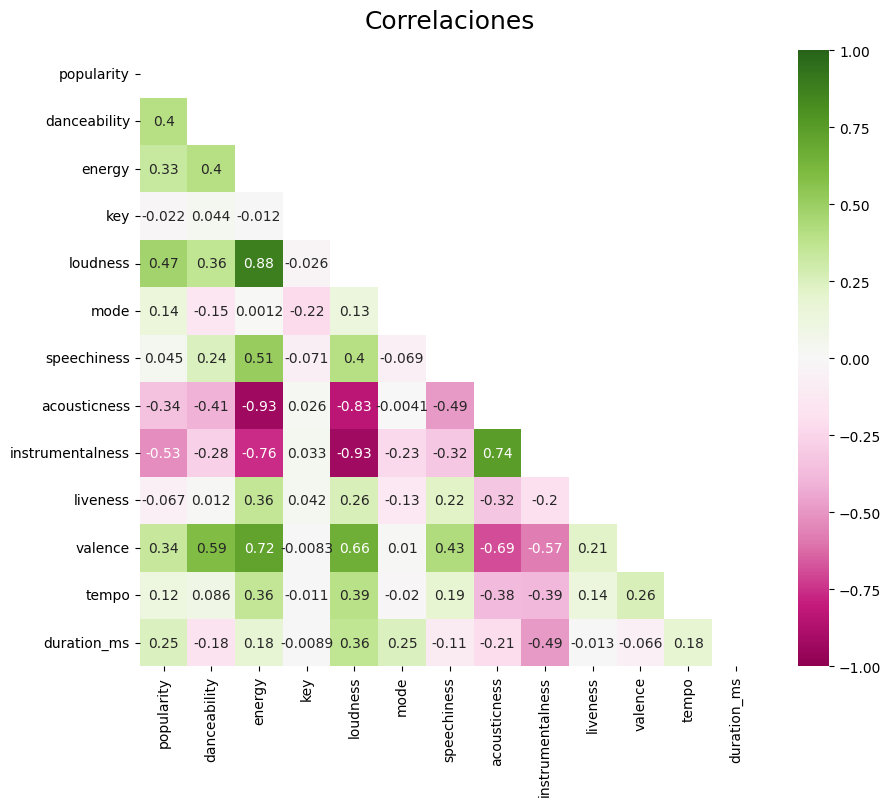

In [52]:
plt.figure(figsize=(10, 8))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df1.select_dtypes(include=[np.number]).corr(), dtype=bool))
heatmap = sns.heatmap(df1.select_dtypes(include=[np.number]).corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='PiYG')
heatmap.set_title('Correlaciones', fontdict={'fontsize':18}, pad=16)

https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

| Coeficiente de correlación | Correlación |
|---|---|
| 0.0- $\pm$ 0.2 | Poca correlación |
| $\pm$ 0.2- $\pm$ 0.4 | Correlación débil |
| $\pm$ 0.4- $\pm$ 0.7 | Correlación clara |
| $\pm$ 0.7- $\pm$ 0.9 | Fuerte correlación |
| $\pm$ 0.9- $\pm$ 1.0 | Muy fuerte correlación |

A continuación se van a mencionar las correlaciones más interesantes:  


Correlaciones con **popularity o popularidad**:  
- Existe <span style="color:green">*correlación positiva*</span> con las variables: *'danceability'* y *'loudness'*. Cuanto más bailable o más sonora es una canción más popular es. También parece afectar positivamente la valencia y la energía.  
- Existe <span style="color:red">*correlación negativa*</span> con *'instrumentalness'*. Es decir, más popular es una canción si contiene voces.    


Correlaciones con **danceability o bailabilidad**:  
- Existe <span style="color:green">*correlación positiva*</span> con *'energy'* y *'valence'*. Existe cierta correlación positiva también con *'loudness'*  
- Existe <span style="color:red">*correlación negativa*</span> con *'acousticness'*, cuanto más acústica menos bailable, tiene sentido.  


Correlaciones con **energy o energía**:  
- Existe una <span style="color:green">*correlación **fuerte** positiva*</span> con las variables *'loudness'* y *'valence'*. También existe correlación con 'speechiness' y hay correlación débil con el tempo.  
- Existe una <span style="color:red">*correlación **muy fuerte** negativa*</span> con la variable *'acousticness'* y fuerte con *'instrumentalness'*.  


Correlaciones con **key o la tonalidad**:  
- Existe una correlación débil con el modo. Realmente una canción puede estar en B (Si) Minor como Mayor.


Correlaciones con **loudness o sonoridad**:  
- Existe <span style="color:green">*correlación positiva*</span> con *'valence'*. También hay cierta correlación con 'speechiness'.    
- Existe <span style="color:red">*correlación **muy fuerte** negativa*</span> con *'instrumentalness'* y **fuerte** correlación con *'acousticness'*. También hay cierta correlación con 'speechiness'.  


Correlaciones con **acousticness** e **instrumentalness**:  
- Ambas tienen una <span style="color:red">*correlación negativa*</span> con la variable valence, cuanto más altas sean estas variables, es decir, cuanto más acústicas o más instrumentales menos alegres son.

<span style="color:yellow">***Centrándonos en la variable que nos indican como de alegres son las canciones, valence, quizás sea conveniente excluir en análisis posteriores aquellas variables no correlacionadas (<0,4) como son: popularity, key, mode y liveness.***</span> 

### Resumen distribuciones:

In [53]:
# Valencia:

fig = go.Figure()

moods = ['Happy', 'Sad', 'Anger', 'Focus']

for mood in moods:
    fig.add_trace(go.Violin(x=df1['Mood'][df1['Mood'] == mood],
                            y=df1['valence'][df1['Mood'] == mood],
                            name=mood,
                            box_visible=True,
                            meanline_visible=True))

fig.update_layout(
    title="Distribución danceability:",
    xaxis_title="Mood",
    yaxis_title="valence"
)

fig.show()

In [54]:
# Bailabilidad:

fig = go.Figure()

moods = ['Happy', 'Sad', 'Anger', 'Focus']

for mood in moods:
    fig.add_trace(go.Violin(x=df1['Mood'][df1['Mood'] == mood],
                            y=df1['danceability'][df1['Mood'] == mood],
                            name=mood,
                            box_visible=True,
                            meanline_visible=True))

fig.update_layout(
    title="Distribución danceability:",
    xaxis_title="Mood",
    yaxis_title="danceability"
)

fig.show()

In [55]:
# Energía:

fig = go.Figure()

moods = ['Happy', 'Sad', 'Anger', 'Focus']

for mood in moods:
    fig.add_trace(go.Violin(x=df1['Mood'][df1['Mood'] == mood],
                            y=df1['energy'][df1['Mood'] == mood],
                            name=mood,
                            box_visible=True,
                            meanline_visible=True))

fig.update_layout(
    title="Distribución danceability:",
    xaxis_title="Mood",
    yaxis_title="energy"
)

fig.show()

In [56]:
# Loudness:

fig = go.Figure()

moods = ['Happy', 'Sad', 'Anger', 'Focus']

for mood in moods:
    fig.add_trace(go.Violin(x=df1['Mood'][df1['Mood'] == mood],
                            y=df1['loudness'][df1['Mood'] == mood],
                            name=mood,
                            box_visible=True,
                            meanline_visible=True))

fig.update_layout(
    title="Distribución loudness:",
    xaxis_title="Mood",
    yaxis_title="loudness"
)

fig.show()

In [ ]:
'''plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura según tus necesidades

# Crear el gráfico de violín utilizando seaborn
sns.violinplot(data=df, x='danceability', y='Mood', inner='quartile', palette='viridis')

# Ajustar el espaciado y las etiquetas de los ejes
plt.xlabel('danceability')
plt.ylabel('Mood')

plt.show()'''